In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os

from omegaconf import OmegaConf

In [96]:
sns.set_style("whitegrid")
sns.set_palette("tab10")
palette = sns.color_palette("tab10")

# LSTM
---

## 07/23 (old pipeline)

In [112]:
log_dir = '/home/lrvnc/Projects/worm-graph/logs/results/NTS_LSTM_07_23'

# Store train time steps and computation time
train_time_steps_old, computation_time_old = [], []

# Store validation losses
val_losses_old = []

# Store validation curves
val_curves_old = []

# Store baseline losses
baseline_losses_old = []

for exp_dir in np.sort(os.listdir(log_dir)):
    
    # Read loss_curves.csv file
    loss_curves = pd.read_csv(os.path.join(log_dir, exp_dir, 'loss_curves.csv'))

    # Load train_info.yaml
    train_info = OmegaConf.load(os.path.join(log_dir, exp_dir, 'train_info.yaml'))

    # Store train time steps and computation time
    train_time_steps_old.append(train_info['worm_timesteps'])
    computation_time_old.append(train_info['seconds_per_epoch'])

    # Store validation losses
    val_losses_old.append(loss_curves['test_losses'].min())

    # Store baseline losses
    baseline_losses_old.append(loss_curves['base_test_losses'].mean())

    # Store entire validation curve
    val_curves_old.append(loss_curves['test_losses'].values)

## 08/18 (new pipeline)

In [113]:
log_dir = '/home/lrvnc/Projects/worm-graph/logs/results/NTS_LSTM_08_18'

# Store train time steps and computation time
train_time_steps_new, computation_time_new = [], []

# Store validation losses
val_losses_new = []

# Store validation curves
val_curves_new = []

# Store baseline validation losses
baseline_losses_new = []

for exp_dir in np.sort(os.listdir(log_dir)):
    
    # Skip if not a directory
    if not os.path.isdir(os.path.join(log_dir, exp_dir)):
        continue

    # Read csv files
    train_dataset_info = pd.read_csv(os.path.join(log_dir, exp_dir, 'train_dataset_info.csv'))
    val_dataset_info = pd.read_csv(os.path.join(log_dir, exp_dir, 'val_dataset_info.csv'))
    train_metrics = pd.read_csv(os.path.join(log_dir, exp_dir, 'train_metrics.csv'))

    # Store train time steps and computation time
    train_time_steps_new.append(train_dataset_info['train_time_steps'].sum())
    computation_time_new.append(train_metrics['train_computation_time'].mean())

    # Store validation losses
    val_losses_new.append(train_metrics['val_loss'].min())

    # Store baseline validation losses
    baseline_losses_new.append(train_metrics['val_baseline'].mean())

    # Store validation curves
    val_curves_new.append(train_metrics['val_loss'].values)


## Plots

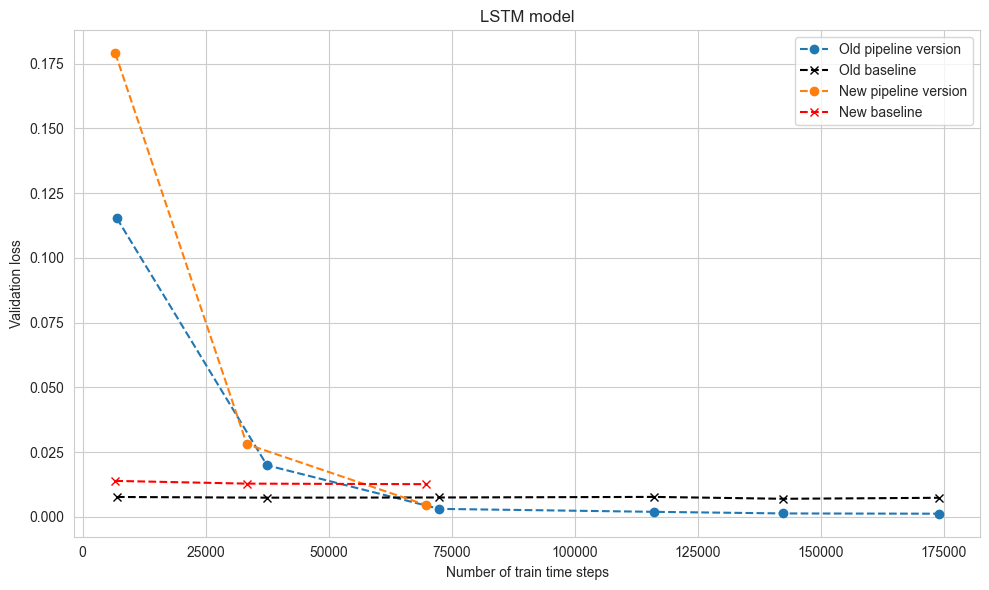

In [122]:
# Validation loss vs. number of train time steps
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train_time_steps_old, val_losses_old, 'o--', label='Old pipeline version')
ax.plot(train_time_steps_old, baseline_losses_old, 'x--', label='Old baseline', color='black')
ax.plot(train_time_steps_new, val_losses_new, 'o--', label='New pipeline version')
ax.plot(train_time_steps_new, baseline_losses_new, 'x--', label='New baseline', color='red')
ax.set_xlabel('Number of train time steps')
ax.set_ylabel('Validation loss')
ax.set_title('LSTM model')
ax.legend()

plt.tight_layout()
plt.show()

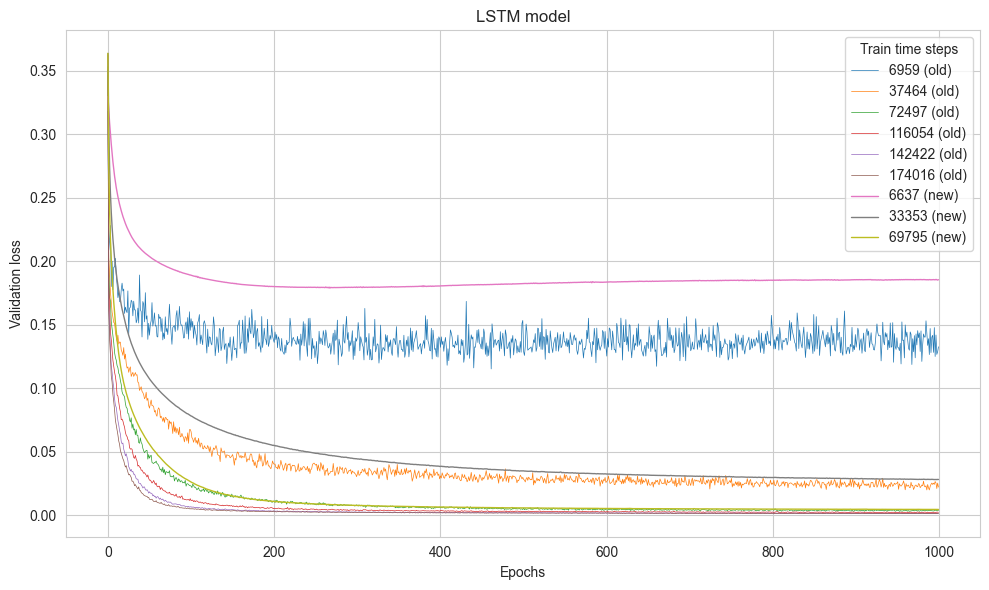

In [108]:
# Validation curve vs. epochs
fig, ax = plt.subplots(figsize=(10, 6))

for val_curve, ts in zip(val_curves_old, train_time_steps_old):
    ax.plot(range(len(val_curve)), val_curve, label=str(ts) + ' (old)', linewidth=0.5)

for val_curve, ts in zip(val_curves_new, train_time_steps_new):
    ax.plot(range(len(val_curve)), val_curve, label=str(ts) + ' (new)', linewidth=1)

ax.set_xlabel('Epochs')
ax.set_ylabel('Validation loss')
ax.set_title('LSTM model')
ax.legend()

# Add title in legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Train time steps')

plt.tight_layout()
plt.show()

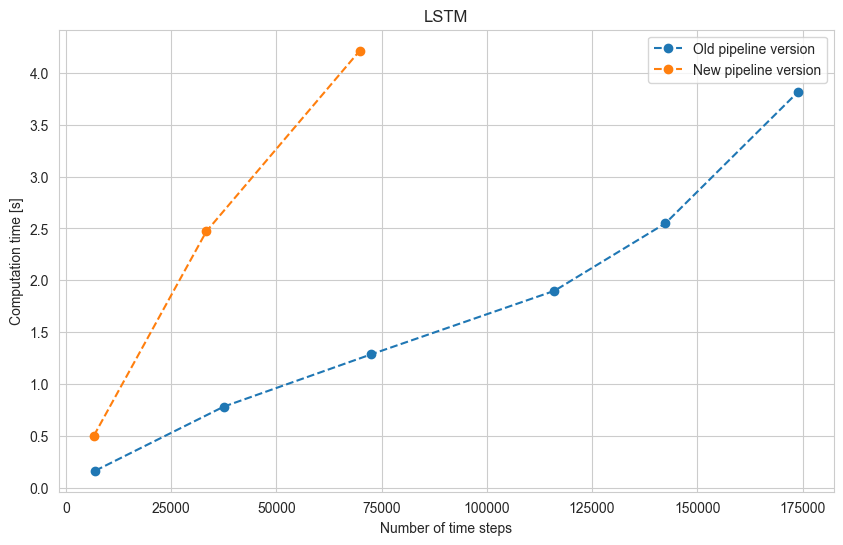

In [110]:
# computation time vs. number of time steps
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train_time_steps_old, computation_time_old, 'o--', label='Old pipeline version')
ax.plot(train_time_steps_new, computation_time_new, 'o--', label='New pipeline version')

ax.set_xlabel('Number of time steps')
ax.set_ylabel('Computation time [s]')
ax.set_title('LSTM')
ax.legend()

plt.show()

In [90]:
log_dir = '/home/lrvnc/Projects/worm-graph/logs/results/NTS_LSTM_08_18'

epoch_val_loss = []
epoch_val_base = []
csv_file_name = []

for csv_file in os.listdir(log_dir):
    # Skip if not csv file
    if not csv_file.endswith('.csv'):
        continue

    # Read csv file
    df = pd.read_csv(os.path.join(log_dir, csv_file))

    epoch_val_loss.append(df[df['key'] == 'epoch_val_loss']['value'].values)
    epoch_val_base.append(df[df['key'] == 'epoch_val_baseline']['value'].values)
    csv_file_name.append(csv_file.split('.')[0])

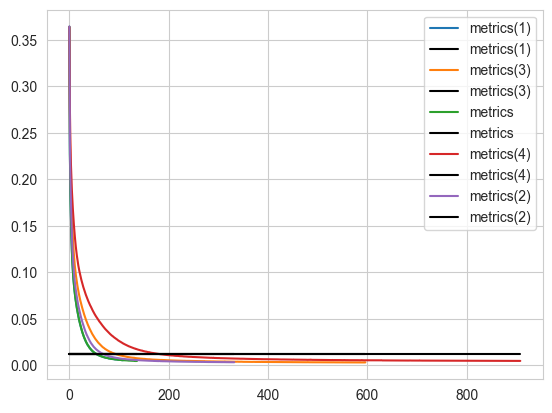

In [92]:
for l, b, n in zip(epoch_val_loss, epoch_val_base, csv_file_name):
    plt.plot(range(len(l)), l, label=n)
    plt.plot(range(len(b)), b, label=n, color='black')

plt.legend()

<Axes: >

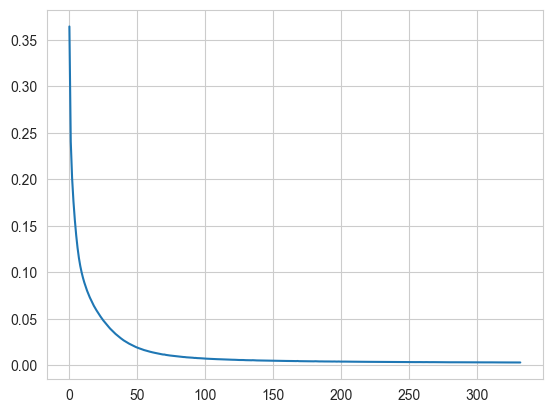